In [1]:
!conda info -e

# conda environments:
#
base                  *  C:\Users\vicae\anaconda3
PythonData               C:\Users\vicae\anaconda3\envs\PythonData
data-06-weatherpy        C:\Users\vicae\anaconda3\envs\data-06-weatherpy
rstudio                  C:\Users\vicae\anaconda3\envs\rstudio
weatherpy                C:\Users\vicae\anaconda3\envs\weatherpy



In [2]:
!conda list gmaps

# packages in environment at C:\Users\vicae\anaconda3:
#
# Name                    Version                   Build  Channel
gmaps                     0.9.0                      py_0    conda-forge


In [3]:
# Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URl for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data. 
city_data = []
# Print the beginning of the logging. 
print("Beginning Data Retrieval    ")
print("----------------------------")
# Create counters.
record_count =1
set_count = 1

# Create an empty list to hold the weather data. 
city_data = []
# Print the beginning of the logging. 
print("Beginning Data Retrieval    ")
print("----------------------------")
# Create counters.
record_count =1
set_count = 1# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 5o for logging purposes.
    if (i %  50 == 0 and i>= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | kyshtovka
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | dubbo
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | komsomolskiy
Processing Record 8 of Set 1 | salamiyah
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | qingyuan
Processing Record 11 of Set 1 | channagiri
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | nouadhibou
Processing Record 14 of Set 1 | erbaa
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | krasnorechenskiy
Processing Record 19 of Set 1 | ridgecrest
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | aklavik
Processing Record 22 o

Processing Record 35 of Set 4 | qeshm
Processing Record 36 of Set 4 | worpswede
Processing Record 37 of Set 4 | fortuna
Processing Record 38 of Set 4 | vuktyl
Processing Record 39 of Set 4 | jacareacanga
Processing Record 40 of Set 4 | woodward
Processing Record 41 of Set 4 | tazovskiy
Processing Record 42 of Set 4 | kavaratti
Processing Record 43 of Set 4 | malwan
City not found. Skipping...
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | culpeper
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | laguna
Processing Record 48 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 49 of Set 4 | nimaj
Processing Record 50 of Set 4 | kuching
Processing Record 1 of Set 5 | bay roberts
Processing Record 2 of Set 5 | batagay-alyta
Processing Record 3 of Set 5 | oussouye
Processing Record 4 of Set 5 | khandyga
Processing Record 5 of Set 5 | provideniya
Processing Record 6 of Set 5 | valparaiso
Processing Record 7 of Set 5 | pisco
Proce

Processing Record 25 of Set 8 | saint anthony
Processing Record 26 of Set 8 | uarini
Processing Record 27 of Set 8 | acarau
Processing Record 28 of Set 8 | hammerfest
Processing Record 29 of Set 8 | bogorodskoye
Processing Record 30 of Set 8 | boyolangu
Processing Record 31 of Set 8 | teya
Processing Record 32 of Set 8 | petrolandia
City not found. Skipping...
Processing Record 33 of Set 8 | mogadishu
Processing Record 34 of Set 8 | haines junction
Processing Record 35 of Set 8 | mahajanga
Processing Record 36 of Set 8 | merauke
Processing Record 37 of Set 8 | saquena
Processing Record 38 of Set 8 | hailey
Processing Record 39 of Set 8 | camacha
Processing Record 40 of Set 8 | cruz alta
Processing Record 41 of Set 8 | nuuk
Processing Record 42 of Set 8 | benghazi
Processing Record 43 of Set 8 | koshurnikovo
Processing Record 44 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 45 of Set 8 | mouila
Processing Record 46 of Set 8 | tiznit
Processing Record 47 of Set 8 | nan

Processing Record 17 of Set 12 | manbij
Processing Record 18 of Set 12 | lafiagi
Processing Record 19 of Set 12 | boende
Processing Record 20 of Set 12 | ternate
Processing Record 21 of Set 12 | noumea
Processing Record 22 of Set 12 | hunza
City not found. Skipping...
Processing Record 23 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 24 of Set 12 | qovlar
Processing Record 25 of Set 12 | tuy hoa
Processing Record 26 of Set 12 | weston
Processing Record 27 of Set 12 | cermik
Processing Record 28 of Set 12 | kendari
Processing Record 29 of Set 12 | nasice
Processing Record 30 of Set 12 | tupik
Processing Record 31 of Set 12 | quang ngai
Processing Record 32 of Set 12 | ahuimanu
Processing Record 33 of Set 12 | pokhara
Processing Record 34 of Set 12 | adre
Processing Record 35 of Set 12 | teahupoo
Processing Record 36 of Set 12 | anar darreh
City not found. Skipping...
Processing Record 37 of Set 12 | iwaki
Processing Record 38 of Set 12 | namatanai
Processing Record 3

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,54.23,72,20,2.30,AU,2022-06-22 03:05:30
1,Kyshtovka,56.5550,76.6271,61.95,74,30,12.55,RU,2022-06-22 03:09:04
2,Punta Arenas,-53.1500,-70.9167,35.71,69,0,19.57,CL,2022-06-22 03:09:04
3,Avarua,-21.2078,-159.7750,82.45,78,40,9.22,CK,2022-06-22 03:09:04
4,Dubbo,-32.2500,148.6167,59.13,51,0,6.91,AU,2022-06-22 03:07:35
5,Mataura,-46.1927,168.8643,47.48,64,0,0.65,NZ,2022-06-22 03:09:05
6,Komsomolskiy,40.4272,71.7189,72.32,46,100,4.61,UZ,2022-06-22 03:09:05
7,Salamiyah,35.0113,37.0532,66.88,79,1,24.27,SY,2022-06-22 03:09:06
8,Vaini,-21.2000,-175.2000,78.96,61,20,13.80,TO,2022-06-22 03:09:06
9,Qingyuan,23.7000,113.0333,89.58,77,100,8.10,CN,2022-06-22 03:09:06


In [13]:
# Reordering the columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-06-22 03:05:30,-42.8794,147.3294,54.23,72,20,2.30
1,Kyshtovka,RU,2022-06-22 03:09:04,56.5550,76.6271,61.95,74,30,12.55
2,Punta Arenas,CL,2022-06-22 03:09:04,-53.1500,-70.9167,35.71,69,0,19.57
3,Avarua,CK,2022-06-22 03:09:04,-21.2078,-159.7750,82.45,78,40,9.22
4,Dubbo,AU,2022-06-22 03:07:35,-32.2500,148.6167,59.13,51,0,6.91
5,Mataura,NZ,2022-06-22 03:09:05,-46.1927,168.8643,47.48,64,0,0.65
6,Komsomolskiy,UZ,2022-06-22 03:09:05,40.4272,71.7189,72.32,46,100,4.61
7,Salamiyah,SY,2022-06-22 03:09:06,35.0113,37.0532,66.88,79,1,24.27
8,Vaini,TO,2022-06-22 03:09:06,-21.2000,-175.2000,78.96,61,20,13.80
9,Qingyuan,CN,2022-06-22 03:09:06,23.7000,113.0333,89.58,77,100,8.10


In [14]:
# Create the output file (CSV)
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1655868238.1298532

In [17]:
today = time.strftime("%x")
today

'06/21/22'

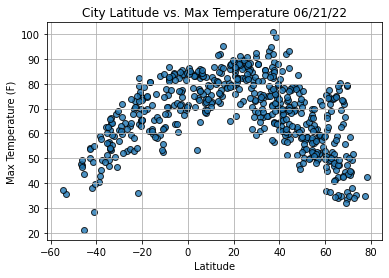

In [18]:
# Import time module
import time

# Add Dependencies
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

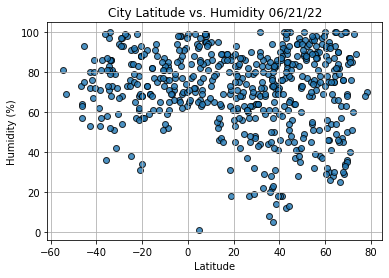

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig2.png")

# Show plot.
plt.show()

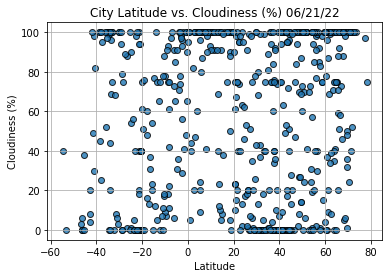

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

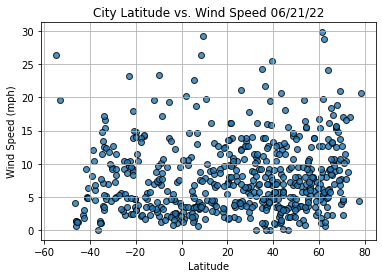

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=11, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                        Erbaa
Country                        TR
Date          2022-06-22 03:09:07
Lat                       40.6689
Lng                       36.5675
Max Temp                    64.87
Humidity                       87
Cloudiness                     94
Wind Speed                   0.87
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
549    False
550     True
551     True
552     True
553     True
Name: Lat, Length: 554, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kyshtovka,RU,2022-06-22 03:09:04,56.5550,76.6271,61.95,74,30,12.55
6,Komsomolskiy,UZ,2022-06-22 03:09:05,40.4272,71.7189,72.32,46,100,4.61
7,Salamiyah,SY,2022-06-22 03:09:06,35.0113,37.0532,66.88,79,1,24.27
9,Qingyuan,CN,2022-06-22 03:09:06,23.7000,113.0333,89.58,77,100,8.10
10,Channagiri,IN,2022-06-22 03:09:07,14.0333,75.9333,72.37,84,100,13.09


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

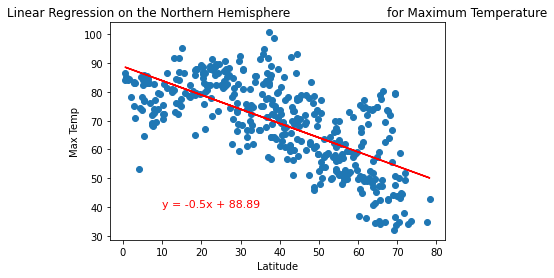

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

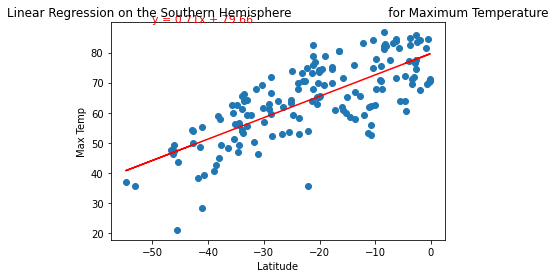

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

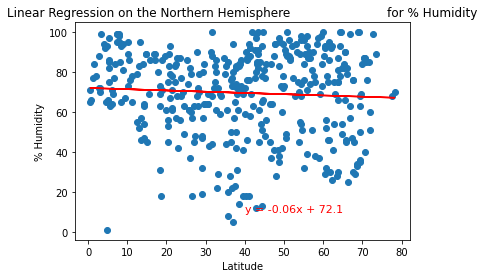

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

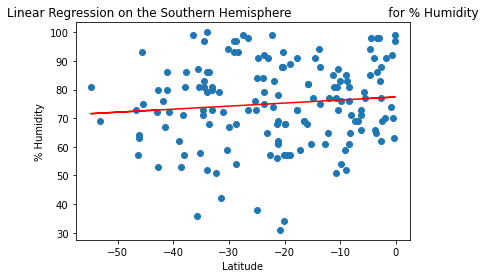

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

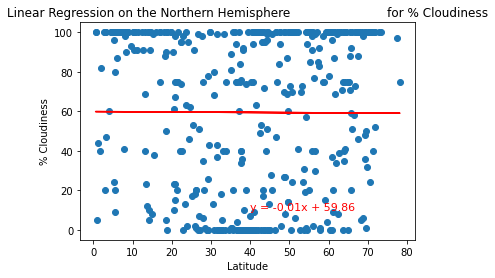

In [31]:
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

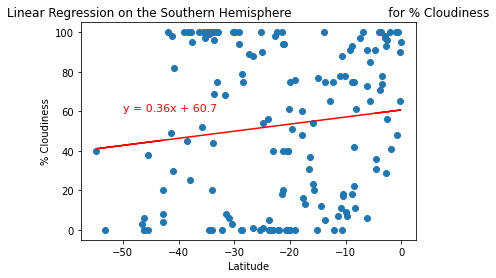

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

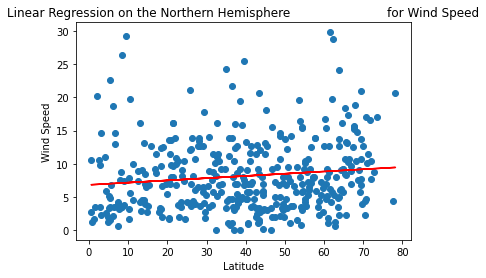

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

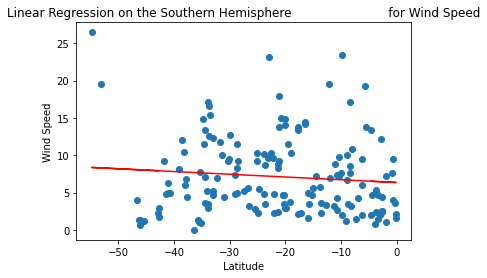

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [57]:
# Import the dependencies.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import gmaps
import os
import requests
import gmaps.datasets
# Import the API key.
from config1 import g_key

In [58]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Hobart,AU,2022-06-22 03:05:30,-42.8794,147.3294,54.23,72,20,2.30
1,1,Kyshtovka,RU,2022-06-22 03:09:04,56.5550,76.6271,61.95,74,30,12.55
2,2,Punta Arenas,CL,2022-06-22 03:09:04,-53.1500,-70.9167,35.71,69,0,19.57
3,3,Avarua,CK,2022-06-22 03:09:04,-21.2078,-159.7750,82.45,78,40,9.22
4,4,Dubbo,AU,2022-06-22 03:07:35,-32.2500,148.6167,59.13,51,0,6.91


In [37]:
# Get the data types.
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [59]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!conda install -c conda-forge gmaps
!jupyter nbextension enable --py --sys-prefix gmaps

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


Solving environment: ...working... done

# All requested packages already installed.



Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [60]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [62]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [73]:
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)

In [74]:
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)


In [75]:
# Add the heatmap layer
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [76]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [77]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [78]:
# Heatmap of percent Wind Speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [79]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [80]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,3,Avarua,CK,2022-06-22 03:09:04,-21.2078,-159.7750,82.45,78,40,9.22
8,8,Vaini,TO,2022-06-22 03:09:06,-21.2000,-175.2000,78.96,61,20,13.80
9,9,Qingyuan,CN,2022-06-22 03:09:06,23.7000,113.0333,89.58,77,100,8.10
15,15,Kapaa,US,2022-06-22 03:09:08,22.0752,-159.3190,82.38,83,40,13.80
16,16,Georgetown,MY,2022-06-22 03:06:32,5.4112,100.3354,85.95,86,20,3.44
22,22,Talnakh,RU,2022-06-22 03:09:10,69.4865,88.3972,79.21,36,50,7.76
34,34,Mayo,US,2022-06-22 03:09:13,38.8876,-76.5119,75.13,84,0,4.61
36,36,Santa Ana,US,2022-06-22 03:09:14,33.7456,-117.8678,85.64,59,75,9.22
38,38,Mackay,AU,2022-06-22 03:09:14,-21.1500,149.2000,75.69,69,94,17.98
41,41,Adrar,MR,2022-06-22 03:09:15,20.5022,-10.0711,84.74,45,10,7.27


In [81]:
preferred_cities_df.count()

City_ID       179
City          179
Country       179
Date          179
Lat           179
Lng           179
Max Temp      179
Humidity      179
Cloudiness    179
Wind Speed    179
dtype: int64

In [82]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
3,Avarua,CK,82.45,-21.2078,-159.7750,
8,Vaini,TO,78.96,-21.2000,-175.2000,
9,Qingyuan,CN,89.58,23.7000,113.0333,
15,Kapaa,US,82.38,22.0752,-159.3190,
16,Georgetown,MY,85.95,5.4112,100.3354,
22,Talnakh,RU,79.21,69.4865,88.3972,
34,Mayo,US,75.13,38.8876,-76.5119,
36,Santa Ana,US,85.64,33.7456,-117.8678,
38,Mackay,AU,75.69,-21.1500,149.2000,
41,Adrar,MR,84.74,20.5022,-10.0711,


In [83]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [85]:
# Dependencies and Setup
import requests
import gmaps

# Import API key
from config1 import g_key

In [86]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'Aap_uEChpMsC57lpB6EwskKm3EUqOjstm2jfPvFSyVaNOVQI0D-q19n18mINYFrxhgfnzMwUpnRP-smwc2iav6gVOiOjrFmBhwdkLEpNau9On2yVkhI26oiZ95AhwMhUyBJExx_FxqFzn9AZrbItHzM8VjjS9RBzBD61vGw-838-DXadZ90m4eXC8CsODsGWd1PK__s_qJ8rVnWgXA99Ms_T6aHeUxRD7W0Zo2qquPxwhpfUMsTXWQaXOFuVORn-gACG_1XSUTyytbWFv7o9AY8wxUofDrIcMv5Adwl7WNG7Q2mHKW007kkGxU8P1F7QZS-GSxkWxmcAiVuIZUt_qCHX7K2y79Fng42_SWJHOdgGA-DAcW-wG7nrvir8doW2jGVpdX4jtRu8_KQYAInyKw_OCo_GfU7DGrA8cJbDMI3jBCCQ3XU7zmUPmcjo',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'nam

In [87]:
len(hotels["results"])

20

In [ ]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
try:
    hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
except (IndexError, NewErrors):
    print("Hotel not found... skipping.")

In [103]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
3,Avarua,CK,82.45,-21.2078,-159.7750,Paradise Inn
8,Vaini,TO,78.96,-21.2000,-175.2000,Keleti Beach Resort
9,Qingyuan,CN,89.58,23.7000,113.0333,Guojin Commercial Hotel
15,Kapaa,US,82.38,22.0752,-159.3190,Sheraton Kauai Coconut Beach Resort
16,Georgetown,MY,85.95,5.4112,100.3354,Cititel Penang
22,Talnakh,RU,79.21,69.4865,88.3972,Talnakh Hotel
34,Mayo,US,75.13,38.8876,-76.5119,Resorts Resource Group International
36,Santa Ana,US,85.64,33.7456,-117.8678,"Motel 6 Santa Ana, CA"
38,Mackay,AU,75.69,-21.1500,149.2000,International Lodge Motel
41,Adrar,MR,84.74,20.5022,-10.0711,


In [104]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [113]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [111]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [114]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))